In [24]:
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
#from imblearn.over_sampling import SMOTE

In [26]:
os.getcwd()
warnings.filterwarnings("ignore")

In [28]:
# Include preprocessing and evaluation
%run 'evaluation.ipynb'

In [30]:
# Preprocessing phase (parameter test size and if need to handle class imbalance using SMOTE
def preprocessing(test_size, use_SMOTE):
    # Load Dataset
    raw_data = pd.read_csv("data.csv", delimiter=';')

    # Define classes                     
    target_classes = ['Dropout', 'Graduate']

    # Filter the dataset to include only 'Dropout' and 'Graduate' in the target column
    raw_data = raw_data[raw_data['Target'].isin(target_classes)]
    
    academic_features = [
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 2nd sem (evaluations)',
    'Admission grade',
    'Previous qualification (grade)'
    ]


    data = raw_data[academic_features + ['Target']]

    # Encode Categorical Variables
    categorical_features = ['Target']
    for col in categorical_features:
        data[col] = LabelEncoder().fit_transform(data[col])

    # Split Data into Features and Target
    X = data.drop(columns=['Target'])
    y = data['Target']

    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Standardize Features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Handle class imbalance using SMOTE
    if use_SMOTE: 
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    return X_train, X_test, y_train, y_test

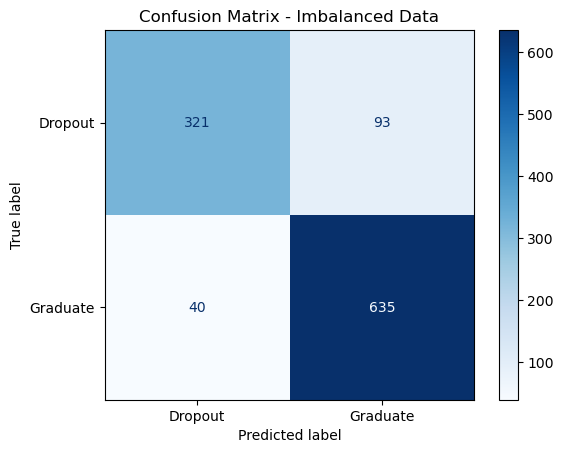


     ____________________________________________
    | Class      | Precision | Recall | F1-Score |
    |------------|-----------|--------|----------|
    | Dropout    | 0.89      | 0.78   | 0.83     |
    | Graduate   | 0.87      | 0.94   | 0.91     |
    |------------|-----------|--------|----------|
    | Accuracy   | 0.88      |          
    | ROC-AUC    | 0.858     |            
    --------------------------
    


In [32]:
# Train a Random Forest classifier
test_size = 0.3
X_train, X_test, y_train, y_test = preprocessing(test_size, False)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(eval_model_generate_markdown(y_test, y_pred, 'Imbalanced Data'))